In [108]:
#  dataset .txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math

In [7]:
# load dataset .txt
df = pd.read_csv('ex2data1.txt', header=None)
df.columns = ['exam1', 'exam2', 'admitted']
df.head()

# separate data into X_train and y_train in numpy array
X_train = df[['exam1', 'exam2']].values
y_train = df['admitted'].values


In [8]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [9]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0 0 0 1 1]
Type of y_train: <class 'numpy.ndarray'>


In [10]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


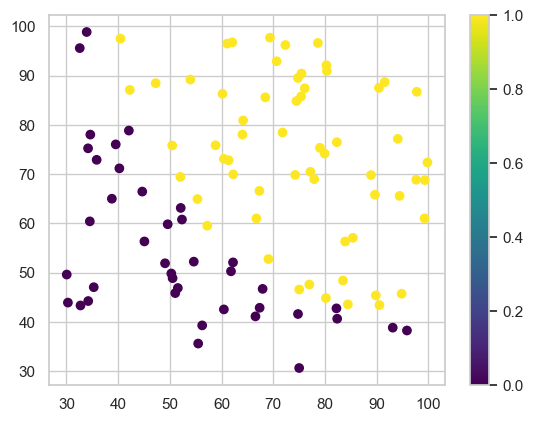

In [15]:
# plt.scatter(X_train[:,0], X_train[:,1], c=data, cmap='viridis')
# add color bar with y_train

fig, ax = plt.subplots()
sc = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')

# Add a color bar
cbar = ax.figure.colorbar(sc, ax=ax)


In [20]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    z = np.clip( z, -500, 500 )           # protect against overflow

    g = 1/(1+np.exp(-z))

    return g

In [107]:
# EPSILON = 1e-8

# def compute_cost_logistic(X, y, w, b):
#     """
#     Computes cost

#     Args:
#       X (ndarray (m,n)): Data, m examples with n features
#       y (ndarray (m,)) : target values
#       w (ndarray (n,)) : model parameters
#       b (scalar)       : model parameter

#     Returns:
#       cost (scalar): cost
#     """

#     m = X.shape[0]
#     cost = 0.0
#     for i in range(m):
#         z_i = np.dot(X[i],w) + b
#         f_wb_i = sigmoid(z_i)
#         cost +=  -y[i]*np.log(f_wb_i + EPSILON) - (1-y[i])*np.log(1-f_wb_i+EPSILON)

#     cost = cost / m
#     return cost




# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    
    ### END CODE HERE ### 

    return total_cost


In [89]:
w_tmp = np.array([1,1])
b_tmp = -123
print(compute_cost(X_train, y_train, w_tmp, b_tmp))

0.520791649297722


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[123 122 121 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106
 105 104 103 102 101 100  99  98  97  96  95  94  93  92  91  90  89  88
  87  86  85  84  83  82  81  80  79  78  77  76  75  74  73  72  71  70
  69  68  67  66  65  64  63  62  61  60  59  58  57  56  55  54  53  52
  51  50  49  48  47  46  45  44  43  42  41  40  39  38  37  36  35  34
  33  32  31  30  29  28  27  26  25  24]


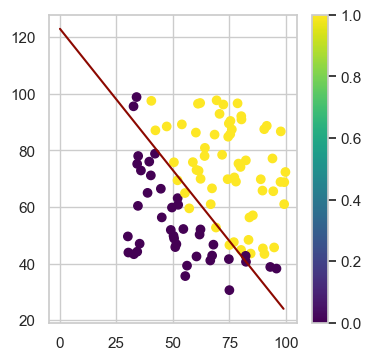

In [93]:
x0 = np.arange(0,100)
print(x0)

# Plot the two decision boundaries
x1 = -b_tmp - x0
print(x1)

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='r', label="$b$=-3")

sc = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')

# Add a color bar
cbar = ax.figure.colorbar(sc, ax=ax)

In [90]:
# mutiply w_tmp and X_train and add b_tmp
print(b_tmp)
y = sigmoid(np.dot(X_train,w_tmp.T) + b_tmp)
# y = sigmoid(1*X_train[:,0] + 1*X_train[:,1] - 120)

# round y to 2 decimal places
y = np.round(y, 2)
print(y)


-123
[0.   0.   0.   1.   1.   0.   1.   0.19 1.   0.99 1.   0.   1.   1.
 0.   1.   0.23 0.   1.   0.83 0.   1.   0.   0.   1.   1.   0.88 1.
 0.   0.   1.   1.   0.   0.18 0.   0.   1.   1.   0.   0.   1.   0.
 1.   0.5  0.   0.   1.   1.   1.   1.   1.   1.   1.   0.   0.   0.
 1.   0.99 1.   1.   1.   0.   0.   0.   0.   0.   1.   0.   1.   0.99
 0.   1.   1.   1.   1.   1.   1.   0.96 0.   0.88 1.   1.   1.   0.
 1.   1.   0.11 1.   1.   0.   1.   1.   0.   1.   1.   1.   1.   1.
 0.06 1.  ]


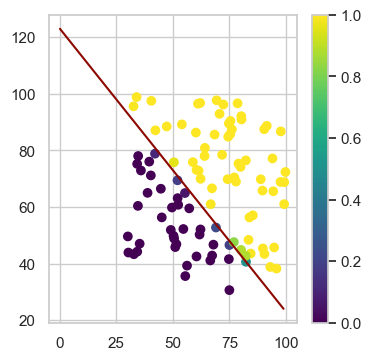

In [94]:
x0 = np.arange(0,100)

# Plot the two decision boundaries
x1 = -b_tmp - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='r', label="$b$=-3")

sc = ax.scatter(X_train[:,0], X_train[:,1], c=y, cmap='viridis')

# Add a color bar
cbar = ax.figure.colorbar(sc, ax=ax)

In [95]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [120]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


Cost at test w,b: 0.218


In [97]:
# mutiply w_tmp and X_train and add b_tmp
print(test_b)
y = sigmoid(np.dot(X_train,test_w.T) + test_b)
# y = sigmoid(1*X_train[:,0] + 1*X_train[:,1] - 120)

# round y to 2 decimal places
y = np.round(y, 2)
print(y)


-24.0
[0.19 0.   0.1  1.   1.   0.02 1.   0.58 1.   0.83 0.94 0.05 1.   1.
 0.29 0.99 0.59 0.25 1.   0.71 0.12 1.   0.02 0.   1.   0.92 0.73 0.92
 0.17 0.04 0.94 0.99 0.28 0.57 0.15 0.07 0.93 0.99 0.33 0.11 0.98 0.01
 1.   0.65 0.01 0.24 1.   1.   1.   1.   1.   1.   0.94 0.01 0.02 0.11
 1.   0.84 0.99 1.   1.   0.   0.01 0.   0.14 0.08 0.97 0.02 1.   0.82
 0.   0.99 1.   0.94 0.95 1.   0.96 0.78 0.03 0.73 1.   0.98 0.94 0.34
 1.   1.   0.55 1.   1.   0.2  1.   1.   0.   1.   0.95 0.91 0.87 1.
 0.51 1.  ]


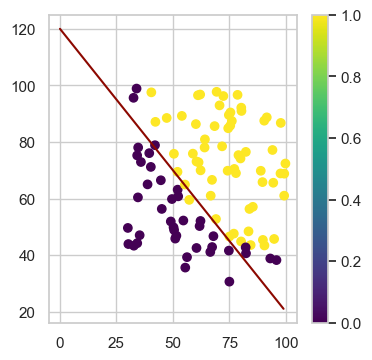

In [103]:
x0 = np.arange(0,100)

# Plot the two decision boundaries
x1 = (-test_b - x0*test_w[0])/test_w[1]

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='r', label="$b$=-3")

sc = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')

# Add a color bar
cbar = ax.figure.colorbar(sc, ax=ax)

In [104]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [105]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [111]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [114]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 2000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.01   
Iteration  200: Cost     0.31   
Iteration  400: Cost     0.31   
Iteration  600: Cost     0.31   
Iteration  800: Cost     0.31   
Iteration 1000: Cost     0.31   
Iteration 1200: Cost     0.31   
Iteration 1400: Cost     0.30   
Iteration 1600: Cost     0.30   
Iteration 1800: Cost     0.30   
Iteration 1999: Cost     0.30   


In [115]:
print(f'w: {w}')
print(f'b: {b}')


w: [0.07 0.06]
b: -8.037495873711519


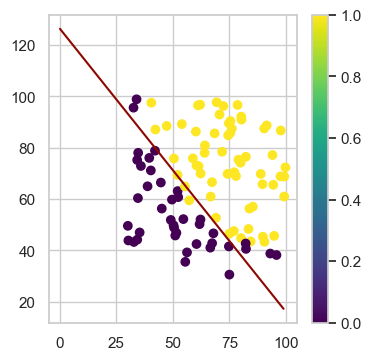

In [117]:
x0 = np.arange(0,100)

# Plot the two decision boundaries
x1 = (-b - x0*w[0])/w[1]

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='r', label="$b$=-3")

sc = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')

# Add a color bar
cbar = ax.figure.colorbar(sc, ax=ax)

In [125]:
# mutiply w_tmp and X_train and add b_tmp
print(test_b)
y = sigmoid(np.dot(X_train,w.T) + b)
# y = sigmoid(1*X_train[:,0] + 1*X_train[:,1] - 120)

# round y to 2 decimal places
y = np.round(y, 2)
print(y)

# # Apply the threshold to the predictions y > 0.5 returns a numpy array of 1s and 0s
y_pred = (y > 0.5).astype(int)
print(y_pred)

print('Train Accuracy: %f'%(np.mean(y_pred == y_train) * 100))



-24.0
[0.34 0.04 0.29 0.84 0.91 0.22 0.92 0.55 0.95 0.66 0.75 0.3  0.93 0.95
 0.39 0.81 0.54 0.42 0.94 0.59 0.36 0.92 0.2  0.06 0.86 0.69 0.61 0.72
 0.38 0.23 0.71 0.83 0.41 0.51 0.33 0.29 0.65 0.83 0.46 0.3  0.81 0.19
 0.94 0.58 0.18 0.41 0.86 0.99 0.92 0.98 0.91 0.94 0.74 0.14 0.21 0.32
 0.96 0.58 0.83 0.88 0.94 0.07 0.17 0.06 0.34 0.32 0.73 0.21 0.97 0.63
 0.05 0.8  0.96 0.7  0.71 0.97 0.71 0.58 0.25 0.61 0.93 0.82 0.71 0.44
 0.97 0.9  0.48 0.95 0.97 0.38 0.97 0.98 0.13 0.93 0.76 0.71 0.61 0.96
 0.49 0.95]
[0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
Train Accuracy: 92.000000
